In [2]:
#pip install --upgrade numpy scipy scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 682.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 541.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.2 MB 7.7 MB/s eta 0:00:06
    --------------------------------------- 0.7/46.2 MB 9.2 MB/s eta 0:00:05
   - -------------------------------------- 1.5/46.2 MB 11.9 MB/s eta 0:00:04
   -- ------------------------------------- 2.6/46.2 MB 15.1 MB/s eta 0:00:03
   --- ------------------------------------ 4.3/46.2 MB 19.6 MB/s eta 0:00:03
   ----- ---------------------------------- 6.8/46.2 MB 25.5 MB/s eta 0:00:02
   --------- ------------------------------ 10.5/46.2 MB 36.4 MB/s eta 0:00:01
   ------------- -------------------------- 15.7/46.2 MB 81.8 MB/s eta 0:

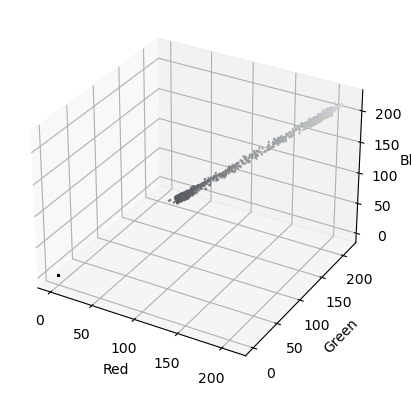

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 이미지 파일 불러오기
image_path = 'track_15.png'  # 이 부분을 이미지 파일 경로로 바꿔주세요.
image = Image.open(image_path)
image = image.convert('RGB')

# 이미지 데이터를 numpy 배열로 변환
data = np.array(image)

# RGB 데이터 추출
r, g, b = data[:,:,0], data[:,:,1], data[:,:,2]

# 3D 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 픽셀의 RGB 값을 점으로 플로팅
# 주의: 대량의 데이터를 플로팅하면 성능 문제가 발생할 수 있습니다.
# 따라서 데이터를 샘플링하거나, 대표값을 사용하는 것을 고려해야 합니다.
# 여기서는 모든 데이터를 플로팅하고 있으나, 필요에 따라 조정하세요.
ax.scatter(r.flatten(), g.flatten(), b.flatten(), c=data.reshape(-1, 3)/255, s=1)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

plt.show()


In [5]:
#pip install threadpoolctl==3.1.0

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


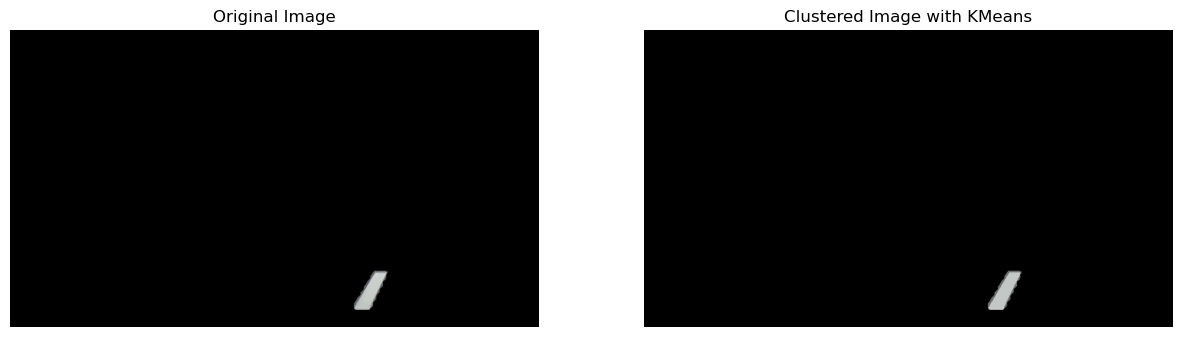

In [1]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 이미지 파일 불러오기
image_path = 'track_15.png'  # 이 부분을 이미지 파일 경로로 바꿔주세요.
image = Image.open(image_path)
image = image.convert('RGB')

# 이미지 데이터를 numpy 배열로 변환
data = np.array(image)

# 이미지 데이터를 (픽셀 수, 채널 수) 형태로 재구성
pixels = data.reshape(-1, 3)

# KMeans 군집화 수행
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pixels)

# 군집 중심을 구하고 각 픽셀을 가장 가까운 군집 중심의 색으로 변경
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# 군집화된 이미지 데이터를 원래 이미지와 같은 형태로 재구성
clustered_img = cluster_centers[cluster_labels].reshape(data.shape).astype(np.uint8)

# 원본 이미지와 군집화된 이미지 표시
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 원본 이미지
axs[0].imshow(data)
axs[0].set_title('Original Image')
axs[0].axis('off')

# 군집화된 이미지
axs[1].imshow(clustered_img)
axs[1].set_title('Clustered Image with KMeans')
axs[1].axis('off')

plt.show()


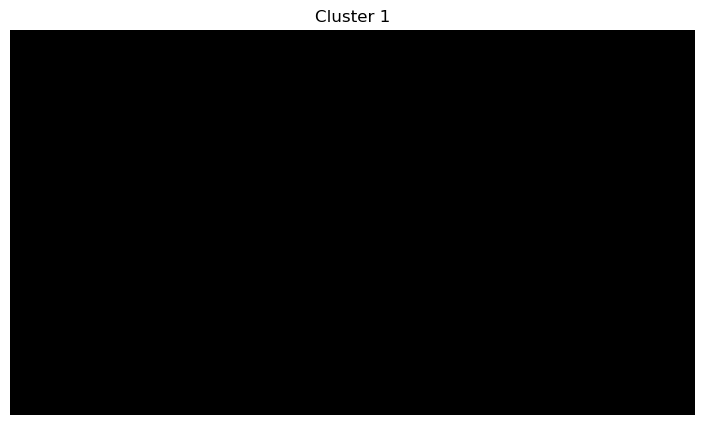

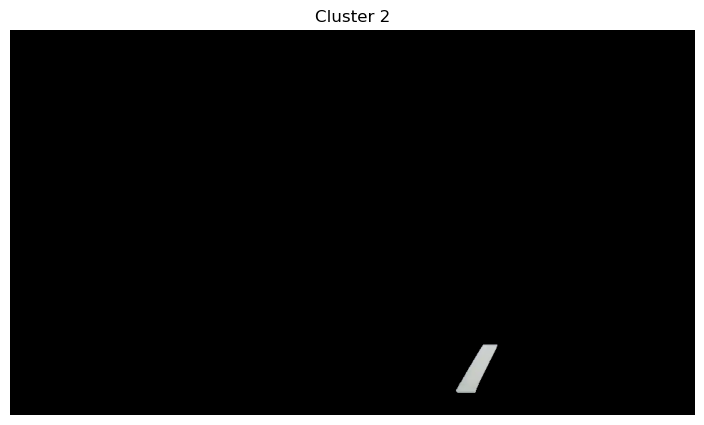

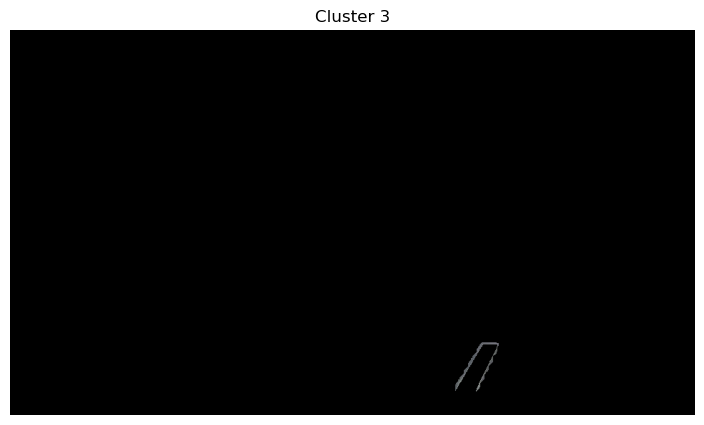

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

# 이미지 불러오기
image_path = 'track_15.png'  # 이미지 경로를 설정하세요.
image = imread(image_path)

# 이미지의 크기를 확인하고 RGB 값을 변환합니다.
h, w, c = image.shape
image_reshaped = image.reshape(h * w, c)

# KMeans 군집화 수행
n_clusters = 3  # 군집의 수를 설정하세요.
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_reshaped)

# 각 픽셀을 가장 가까운 군집의 중심으로 대체
clustered = kmeans.cluster_centers_[kmeans.labels_]

# 군집화된 이미지를 원본 이미지의 차원으로 변환
clustered_image = clustered.reshape(h, w, c)
clustered_image = np.clip(clustered_image, 0, 1)  # 값의 범위를 [0, 1]로 재조정

# 각 군집에 해당하는 이미지 생성 및 출력
for i in range(n_clusters):
    # 군집에 속하는 픽셀만 선택
    mask = kmeans.labels_.reshape(h, w) == i
    cluster_image = np.zeros((h, w, c))
    cluster_image[mask] = image[mask]
    
    # 군집별로 이미지 출력
    plt.figure(figsize=(10, 5))
    plt.imshow(cluster_image)
    plt.title(f'Cluster {i+1}')
    plt.axis('off')
    plt.show()


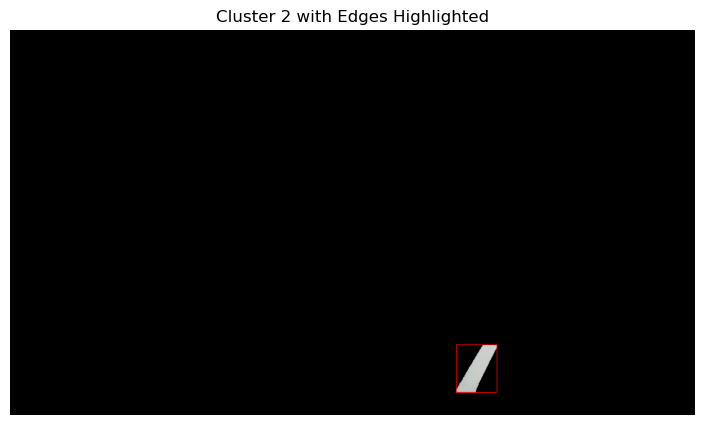

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

# 이미지 불러오기
image_path = 'track_15.png'  # 이미지 경로를 설정하세요.
image = imread(image_path)

# 이미지의 크기를 확인하고 RGB 값을 변환합니다.
h, w, c = image.shape
image_reshaped = image.reshape(h * w, c)

# KMeans 군집화 수행
n_clusters = 3  # 군집의 수를 설정하세요.
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_reshaped)

# 군집 2의 이미지 선택
cluster_2_mask = kmeans.labels_.reshape(h, w) == 1  # 군집 2는 i=1에 해당
cluster_2_image = np.zeros((h, w, c))
cluster_2_image[cluster_2_mask] = image[cluster_2_mask]

# 군집 2의 이미지에서 검은색이 아닌 픽셀의 위치 찾기
non_black_pixels = np.where(np.all(cluster_2_image != [0, 0, 0], axis=-1))

# 가장 왼쪽, 위쪽, 아래쪽, 오른쪽에 해당하는 픽셀 찾기
top_pixel = np.min(non_black_pixels[0])
bottom_pixel = np.max(non_black_pixels[0])
left_pixel = np.min(non_black_pixels[1])
right_pixel = np.max(non_black_pixels[1])

# 해당 위치에 픽셀 색상 변경하기 (빨간색으로 표시)
cluster_2_image[top_pixel, left_pixel:right_pixel] = [1, 0, 0]  # 상단 가로선
cluster_2_image[bottom_pixel, left_pixel:right_pixel] = [1, 0, 0]  # 하단 가로선
cluster_2_image[top_pixel:bottom_pixel, left_pixel] = [1, 0, 0]  # 좌측 세로선
cluster_2_image[top_pixel:bottom_pixel, right_pixel] = [1, 0, 0]  # 우측 세로선

# 수정된 이미지 출력
plt.figure(figsize=(10, 5))
plt.imshow(cluster_2_image)
plt.title('Cluster 2 with Edges Highlighted')
plt.axis('off')
plt.show()


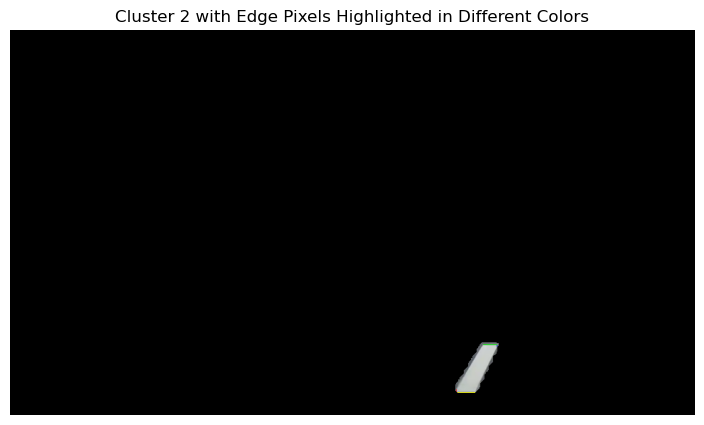

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

# 이미지 불러오기
image_path = 'track_15.png'
image = imread(image_path)

# 이미지의 크기를 확인하고 RGB 값을 변환합니다.
h, w, c = image.shape
image_reshaped = image.reshape(h * w, c)

# KMeans 군집화 수행
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_reshaped)

# 군집 2(인덱스로는 1)의 마스크 생성
cluster_2_mask = kmeans.labels_.reshape(h, w) == 1

# 군집 2에 해당하는 픽셀 위치 찾기
y_indices, x_indices = np.where(cluster_2_mask)

# 각각의 방향에 따라 가장자리 픽셀 찾기
leftmost_x = np.min(x_indices)
rightmost_x = np.max(x_indices)
topmost_y = np.min(y_indices)
bottommost_y = np.max(y_indices)

# 군집화된 이미지를 원본 이미지의 차원으로 변환하여 복사
clustered_image = image.copy()

# 각 방향의 가장자리 픽셀 색상 변경
# 왼쪽 가장자리 빨간색으로 표시
clustered_image[y_indices[x_indices == leftmost_x], leftmost_x] = [1, 0, 0]
# 오른쪽 가장자리 파란색으로 표시
clustered_image[y_indices[x_indices == rightmost_x], rightmost_x] = [0, 0, 1]
# 위쪽 가장자리 초록색으로 표시
clustered_image[topmost_y, x_indices[y_indices == topmost_y]] = [0, 1, 0]
# 아래쪽 가장자리 노란색으로 표시
clustered_image[bottommost_y, x_indices[y_indices == bottommost_y]] = [1, 1, 0]

# 수정된 이미지 출력
plt.figure(figsize=(10, 5))
plt.imshow(clustered_image)
plt.title('Cluster 2 with Edge Pixels Highlighted in Different Colors')
plt.axis('off')
plt.show()


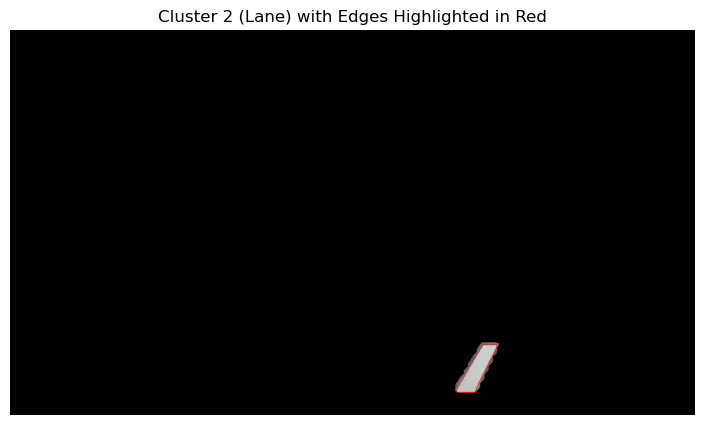

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread
from skimage.morphology import binary_erosion, binary_dilation

# 이미지 불러오기
image_path = 'track_15.png'
image = imread(image_path)

# 이미지의 크기를 확인하고 RGB 값을 변환합니다.
h, w, c = image.shape
image_reshaped = image.reshape(h * w, c)

# KMeans 군집화 수행
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_reshaped)

# 군집 2(인덱스로는 1)의 마스크 생성
cluster_2_mask = kmeans.labels_.reshape(h, w) == 1

# 테두리 픽셀 찾기 (테두리를 이루는 픽셀은 원래 이미지에서는 있지만, 침식된 이미지에서는 없는 픽셀)
eroded_mask = binary_erosion(cluster_2_mask)
edge_mask = cluster_2_mask & ~eroded_mask

# 군집화된 이미지를 원본 이미지의 차원으로 변환하여 복사
clustered_image = image.copy()

# 테두리 픽셀을 빨간색으로 변경
clustered_image[edge_mask] = [1, 0, 0]  # 빨간색으로 변경

# 수정된 이미지 출력
plt.figure(figsize=(10, 5))
plt.imshow(clustered_image)
plt.title('Cluster 2 (Lane) with Edges Highlighted in Red')
plt.axis('off')
plt.show()


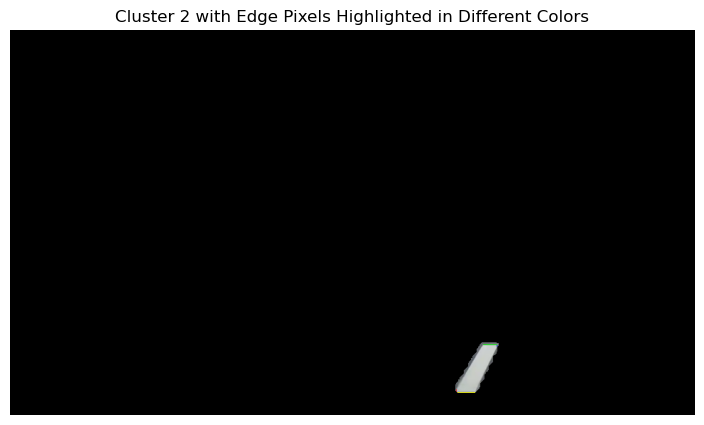

: 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

# 이미지 불러오기
image_path = 'track_15.png'  # 이미지 경로를 입력하세요
image = imread(image_path)

# 이미지의 크기를 확인하고 RGB 값을 변환합니다.
h, w, c = image.shape
image_reshaped = image.reshape(h * w, c)

# KMeans 군집화 수행
n_clusters = 3  # 군집의 개수
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_reshaped)

# 군집 2(인덱스로는 1)의 마스크 생성
cluster_2_mask = kmeans.labels_.reshape(h, w) == 1  # 여기서는 군집 2를 인덱스 1로 가정

# 군집 2에 해당하는 픽셀 위치 찾기
y_indices, x_indices = np.where(cluster_2_mask)

# 가장자리 픽셀 찾기
leftmost_x = np.min(x_indices)
rightmost_x = np.max(x_indices)
topmost_y = np.min(y_indices)
bottommost_y = np.max(y_indices)

# 군집화된 이미지를 원본 이미지의 차원으로 변환하여 복사
clustered_image = image.copy()

# 왼쪽 가장자리 픽셀을 빨간색으로 표시
clustered_image[y_indices[x_indices == leftmost_x], leftmost_x] = [1, 0, 0]  # 빨간색
# 오른쪽 가장자리 픽셀을 파란색으로 표시
clustered_image[y_indices[x_indices == rightmost_x], rightmost_x] = [0, 0, 1]  # 파란색
# 위쪽 가장자리 픽셀을 초록색으로 표시
clustered_image[topmost_y, x_indices[y_indices == topmost_y]] = [0, 1, 0]  # 초록색
# 아래쪽 가장자리 픽셀을 노란색으로 표시
clustered_image[bottommost_y, x_indices[y_indices == bottommost_y]] = [1, 1, 0]  # 노란색

# 수정된 이미지 출력
plt.figure(figsize=(10, 5))
plt.imshow(clustered_image)
plt.title('Cluster 2 with Edge Pixels Highlighted in Different Colors')
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


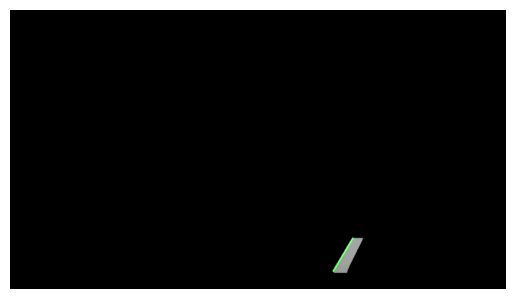

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 군집 2의 이미지 선택 (군집은 0부터 시작하므로 cluster 2는 인덱스로 1입니다)
cluster_index = 1
mask = kmeans.labels_.reshape(h, w) == cluster_index
cluster_image = np.zeros((h, w, c))
cluster_image[mask] = image[mask]

# 차선 이미지를 회색조로 변환
gray = cv2.cvtColor((cluster_image * 255).astype(np.uint8), cv2.COLOR_BGR2GRAY)

# Canny 엣지 검출기를 이용한 엣지 검출
edges = cv2.Canny(gray, 50, 150)

# 허프 변환을 이용한 직선 검출
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=10)

# 검출된 직선 그리기
line_image = np.copy(cluster_image) * 0  # 검출된 선을 그릴 빈 이미지

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 원본 이미지에 검출된 선을 그린 이미지를 합성
combo_image = cv2.addWeighted(cluster_image, 0.8, line_image, 1, 0)

# 결과 이미지 출력
plt.imshow(combo_image)
plt.axis('off')
plt.show()


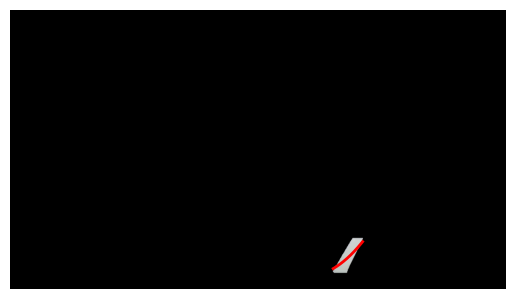

In [11]:
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 엣지 포인트의 좌표 추출
points = np.argwhere(edges > 0)
x = points[:, 1].reshape(-1, 1)  # 가로축 좌표
y = points[:, 0]  # 세로축 좌표

# 다항식 곡선 추정을 위한 RANSAC 모델 생성
# 여기서는 2차 다항식을 사용하나, 필요에 따라 차수를 조정할 수 있습니다.
model = make_pipeline(PolynomialFeatures(2), RANSACRegressor(random_state=42))

# 모델 학습
model.fit(x, y)

# 학습된 모델을 이용해 곡선의 y값 예측
x_fit = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
y_fit = model.predict(x_fit)

# 결과를 그래프로 표시
plt.imshow(cluster_image)
plt.plot(x_fit, y_fit, color='red', linewidth=2)  # 추정된 곡선 그리기
plt.axis('off')
plt.show()


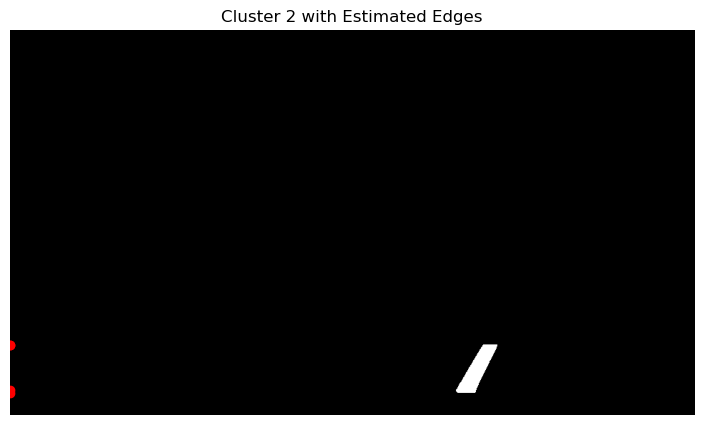

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread
from sklearn.linear_model import LinearRegression

# 이미지 불러오기
image_path = 'track_15.png'  # 이미지 경로를 설정하세요.
image = imread(image_path)

# 이미지의 크기를 확인하고 RGB 값을 변환합니다.
h, w, c = image.shape
image_reshaped = image.reshape(h * w, c)

# KMeans 군집화 수행
n_clusters = 3  # 군집의 수를 설정하세요.
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_reshaped)

# cluster 2가 차선에 해당한다고 가정 (인덱스는 1)
cluster_index = 1
mask = kmeans.labels_.reshape(h, w) == cluster_index

# 차선 픽셀의 좌표 추출
y_coords, x_coords = np.where(mask)

# 상하좌우 가장자리 픽셀 찾기
left_edge_x = x_coords[np.argmin(x_coords)]
left_edge_y = y_coords[np.argmin(x_coords)]
right_edge_x = x_coords[np.argmax(x_coords)]
right_edge_y = y_coords[np.argmax(x_coords)]
top_edge_x = x_coords[np.argmin(y_coords)]
top_edge_y = y_coords[np.argmin(y_coords)]
bottom_edge_x = x_coords[np.argmax(y_coords)]
bottom_edge_y = y_coords[np.argmax(y_coords)]

# 각 가장자리 픽셀에 대한 모델 학습 및 예측
models = []
edges = [(left_edge_x, left_edge_y), (right_edge_x, right_edge_y), (top_edge_x, top_edge_y), (bottom_edge_x, bottom_edge_y)]
for edge in edges:
    x, y = edge
    # 각 가장자리에 대해 단순 선형 회귀 모델을 학습
    # 실제 사용 시, 더 적합한 모델을 고려하시기 바랍니다.
    model = LinearRegression()
    model.fit(X=[[x]], y=[y])
    models.append(model)

# 모델을 이용해 예측 및 그래프 그리기
plt.figure(figsize=(10, 5))
plt.imshow(mask, cmap='gray')  # 차선 군집 표시
plt.title('Cluster 2 with Estimated Edges')
plt.axis('off')

# 각 가장자리에 대한 선 그리기
for model in models:
    # 예제에서는 모델을 실제로 예측하는 대신, 가장자리 포인트를 표시합니다.
    plt.scatter([model.coef_], [model.intercept_], color='red')

plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

# 이미지 불러오기
image_path = 'track_15.png'  # 이미지 경로를 설정하세요.
image = imread(image_path)

# 이미지의 크기를 확인하고 RGB 값을 변환합니다.
h, w, c = image.shape
image_reshaped = image.reshape(h * w, c)

# KMeans 군집화 수행
n_clusters = 3  # 군집의 수를 설정하세요.
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_reshaped)

# 각 픽셀을 가장 가까운 군집의 중심으로 대체
clustered = kmeans.cluster_centers_[kmeans.labels_]

# 군집화된 이미지를 원본 이미지의 차원으로 변환
clustered_image = clustered.reshape(h, w, c)
clustered_image = np.clip(clustered_image, 0, 1)  # 값의 범위를 [0, 1]로 재조정

# 군집 2에 해당하는 이미지 저장
i = 1  # 군집 2의 인덱스 (0부터 시작하므로 1은 두 번째 군집을 의미)
# 군집에 속하는 픽셀만 선택
mask = kmeans.labels_.reshape(h, w) == i
cluster_image = np.zeros((h, w, c))
cluster_image[mask] = image[mask]

# 군집별로 이미지 저장
plt.figure(figsize=(10, 5))
plt.imshow(cluster_image)
plt.title(f'Cluster {i+1}')
plt.axis('off')

# 저장할 파일 경로와 이름 지정
save_path = f'cluster_{i+1}_clustering.png'
plt.savefig(save_path, bbox_inches='tight')
plt.close()  # 현재 그림을 닫아 다른 그림에 영향을 주지 않음

print(f'Cluster {i+1} 이미지가 "{save_path}"로 저장되었습니다.')


Cluster 2 이미지가 "cluster_2_clustering.png"로 저장되었습니다.


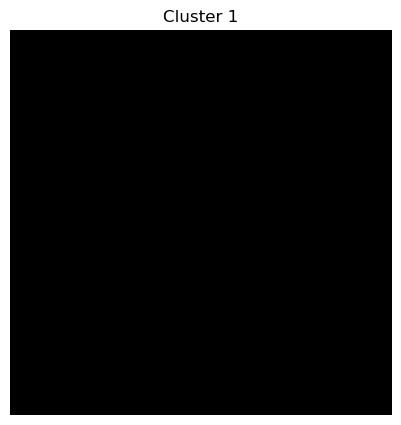

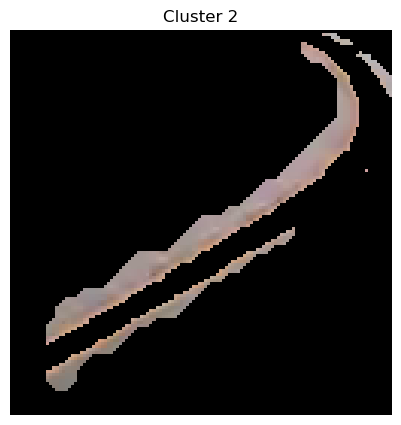

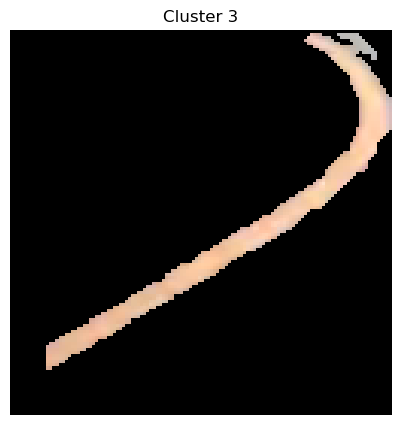

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

# 이미지 불러오기
image_path = 'curve1.png'  # 이미지 경로를 설정하세요.
image = imread(image_path)

# 이미지의 크기를 확인하고 RGB 값을 변환합니다.
h, w, c = image.shape
image_reshaped = image.reshape(h * w, c)

# KMeans 군집화 수행
n_clusters = 3  # 군집의 수를 설정하세요.
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_reshaped)

# 각 픽셀을 가장 가까운 군집의 중심으로 대체
clustered = kmeans.cluster_centers_[kmeans.labels_]

# 군집화된 이미지를 원본 이미지의 차원으로 변환
clustered_image = clustered.reshape(h, w, c)
clustered_image = np.clip(clustered_image, 0, 1)  # 값의 범위를 [0, 1]로 재조정

# 각 군집에 해당하는 이미지 생성 및 출력
for i in range(n_clusters):
    # 군집에 속하는 픽셀만 선택
    mask = kmeans.labels_.reshape(h, w) == i
    cluster_image = np.zeros((h, w, c))
    cluster_image[mask] = image[mask]
    
    # 군집별로 이미지 출력
    plt.figure(figsize=(10, 5))
    plt.imshow(cluster_image)
    plt.title(f'Cluster {i+1}')
    plt.axis('off')
    plt.show()
